<a href="https://colab.research.google.com/github/Prasenjit10/ML-ASSIGNMENTS/blob/main/Assignment_1B.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
dataset=pd.read_csv('used_cars_dataset.csv')
# Display first few rows
print(dataset.head())

                       name  year  km_driven    fuel seller_type transmission  \
0             Maruti 800 AC  2007      70000  Petrol  Individual       Manual   
1  Maruti Wagon R LXI Minor  2007      50000  Petrol  Individual       Manual   
2      Hyundai Verna 1.6 SX  2012     100000  Diesel  Individual       Manual   
3    Datsun RediGO T Option  2017      46000  Petrol  Individual       Manual   
4     Honda Amaze VX i-DTEC  2014     141000  Diesel  Individual       Manual   

          owner  selling_price  
0   First Owner          60000  
1   First Owner         135000  
2   First Owner         600000  
3   First Owner         250000  
4  Second Owner         450000  


In [3]:
# Check for missing values
print(dataset.isnull().sum())

name             0
year             0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
selling_price    0
dtype: int64


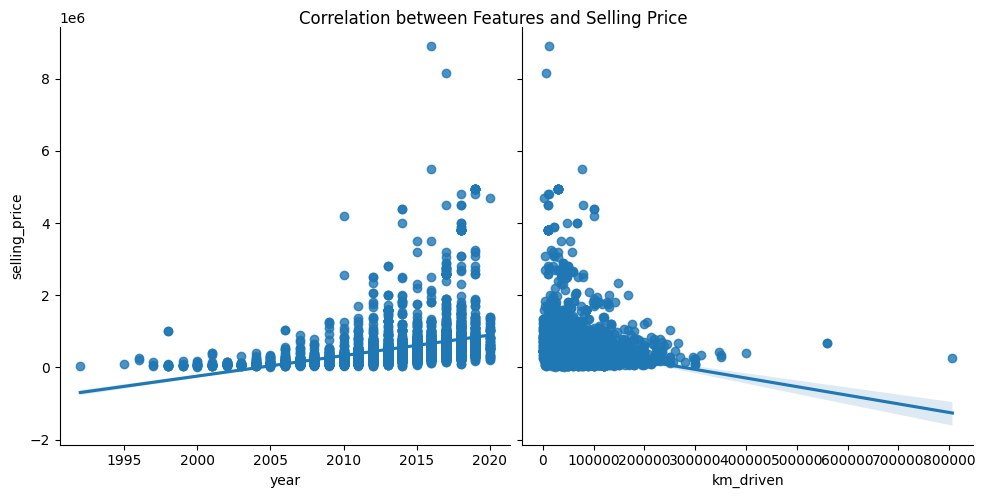

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt
# Exploratory Data Analysis (EDA)
sns.pairplot(
    data=dataset,
    x_vars=['year', 'km_driven'],
    y_vars=['selling_price'],
    height=5,
    aspect=1,
    kind='reg'
)
plt.suptitle("Correlation between Features and Selling Price")
plt.show()

In [6]:
# Data Preprocessing
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

# Select numerical and categorical columns
num_features = dataset.select_dtypes(include=np.number)
cat_features = dataset.select_dtypes(exclude=np.number)

# Create preprocessing pipeline
data_preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), num_features.columns),
        ('cat', OneHotEncoder(handle_unknown='ignore'), cat_features.columns)
    ]
)


In [7]:
# Separate features and target
X_processed = data_preprocessor.fit_transform(dataset)
y_target = dataset['selling_price']

# Train-Test Split

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_processed, y_target, test_size=0.2, random_state=42
)

In [8]:
# Model Training
from sklearn.linear_model import LinearRegression

regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [9]:
# Model Evaluation
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

# Predictions
y_predicted = regressor.predict(X_test)

# Evaluation metrics
print("R² Score:", r2_score(y_test, y_predicted))
print("Mean Absolute Error:", mean_absolute_error(y_test, y_predicted))
print("Mean Squared Error:", mean_squared_error(y_test, y_predicted))

R² Score: 0.9999999999577959
Mean Absolute Error: 2.352358972232948
Mean Squared Error: 12.879448112095707


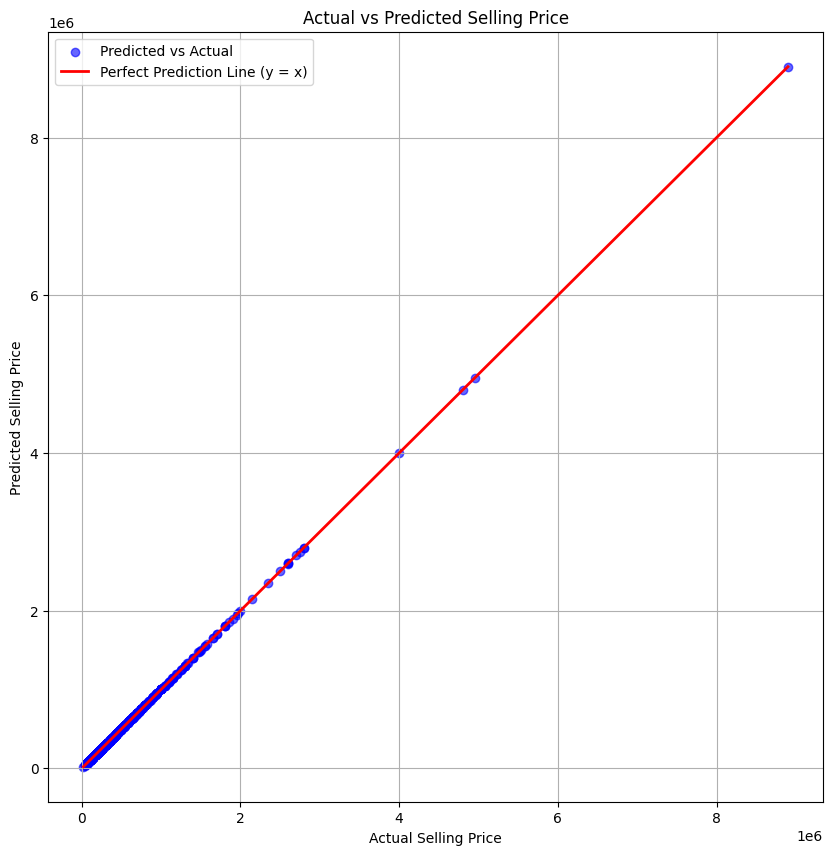

In [10]:
# Visualization: Actual vs Predicted
plt.figure(figsize=(10, 10))
plt.scatter(y_test, y_predicted, color='blue', alpha=0.6, label='Predicted vs Actual')
plt.plot(
    [y_test.min(), y_test.max()],
    [y_test.min(), y_test.max()],
    color='red',
    linewidth=2,
    label='Perfect Prediction Line (y = x)'
)
plt.xlabel('Actual Selling Price')
plt.ylabel('Predicted Selling Price')
plt.title('Actual vs Predicted Selling Price')
plt.legend()
plt.grid(True)
plt.show()